# CSMODEL Phase 1

## Research Question: Which Variables Affect the Quality of Wine the Most ? 

Roles:
Dataset Description - Ethan <br>
Data Cleaning - Paul, Hans <br>
Exploratory Data Analysis - Hans <br>
Research Questions - Paul, Ethan <br>


<h1 style="color:blue">Data Set Description</h1>
Lorem Ipsum


In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats as st
from scipy.stats import pointbiserialr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


# Reading the dataset 

In [138]:
df = pd.DataFrame()
df = pd.read_csv("wine-quality-white-and-red.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [139]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

<h1 style="color:blue">Cleaning the Dataset</h1>


In order to conduct a proper study using the <b>red wine dataset</b> it is essential to clean the data and rid the dataset of the following:

- multiple representation of the same categorical value
- incorrect datatype variable
- values that are set to default values of the variable 
- missing data
- duplicate data
- inconsistent formatting

For this study, it is only required to clean variables that will utilized in the study; as such the following varibles will be used

- **`fixed acidity`**: collection of volatility organic acids.
- **`volatile acidity`**:
- **`citric acid`**:
- **`residual sugar`**:
- **`chlorides`**:
- **`free sulfer dioxide`**:
- **`total sulfer dioxide`**:
- **`density`**:
- **`pH`**: the potency and concentration of of the dissociated acids in the wine
- **`sulphates`**:
- **`alchohol`**:
- **`quality`**:


# Get the datatypes per column

In [140]:
datatypes = df.dtypes
datatypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# Get the null values per column

In [141]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Drop duplicate values

In [142]:
df = df.drop_duplicates(keep = 'first', inplace = False)
df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
6     white            6.2             0.320         0.16             7.0   
...     ...            ...               ...          ...             ...   
6491    red            6.8             0.620         0.08             1.9   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
6         0.045                 30.0                 136.0  0.99490  3.18   
...         ...                  ...                   ...      ...   ...   
6491      0.068                 28.0                  38.0  0.99651  3.42   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
6          0.47      9.6        6  
...         ...      ...      ...  
6491       0.82      9.5        6  
6492       0.58     10.5        5  
6493       0.76     11.2        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[5320 rows x 13 columns]

As of the table above, no notable deletions occured. no duplicated row were found.

### **`fixed acidity`** variable

In [143]:
val = df["fixed acidity"].unique()
val.sort()
print(val)
print(len(val))

[ 3.8   3.9   4.2   4.4   4.5   4.6   4.7   4.8   4.9   5.    5.1   5.2
  5.3   5.4   5.5   5.6   5.7   5.8   5.9   6.    6.1   6.15  6.2   6.3
  6.4   6.45  6.5   6.6   6.7   6.8   6.9   7.    7.1   7.15  7.2   7.3
  7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2   8.3   8.4   8.5
  8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4   9.5   9.6   9.7
  9.8   9.9  10.   10.1  10.2  10.3  10.4  10.5  10.6  10.7  10.8  10.9
 11.   11.1  11.2  11.3  11.4  11.5  11.6  11.7  11.8  11.9  12.   12.1
 12.2  12.3  12.4  12.5  12.6  12.7  12.8  12.9  13.   13.2  13.3  13.4
 13.5  13.7  13.8  14.   14.2  14.3  15.   15.5  15.6  15.9 ]
106


In [144]:
df['fixed acidity'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`fixed acidity`** column

therefore, we can conclude that the **`fixed acidity`** column is clean

### **`volatile acidity`** variable



In [145]:
val = df['volatile acidity'].unique()
val.sort()
print(val)
print(len(val))

[0.08  0.085 0.09  0.1   0.105 0.11  0.115 0.12  0.125 0.13  0.135 0.14
 0.145 0.15  0.155 0.16  0.165 0.17  0.175 0.18  0.185 0.19  0.2   0.205
 0.21  0.215 0.22  0.225 0.23  0.235 0.24  0.245 0.25  0.255 0.26  0.265
 0.27  0.275 0.28  0.285 0.29  0.295 0.3   0.305 0.31  0.315 0.32  0.325
 0.33  0.335 0.34  0.345 0.35  0.355 0.36  0.365 0.37  0.375 0.38  0.385
 0.39  0.395 0.4   0.405 0.41  0.415 0.42  0.425 0.43  0.435 0.44  0.445
 0.45  0.455 0.46  0.47  0.475 0.48  0.485 0.49  0.495 0.5   0.51  0.52
 0.53  0.54  0.545 0.55  0.555 0.56  0.565 0.57  0.575 0.58  0.585 0.59
 0.595 0.6   0.605 0.61  0.615 0.62  0.625 0.63  0.635 0.64  0.645 0.65
 0.655 0.66  0.665 0.67  0.675 0.68  0.685 0.69  0.695 0.7   0.705 0.71
 0.715 0.72  0.725 0.73  0.735 0.74  0.745 0.75  0.755 0.76  0.765 0.77
 0.775 0.78  0.785 0.79  0.795 0.8   0.805 0.81  0.815 0.82  0.825 0.83
 0.835 0.84  0.845 0.85  0.855 0.86  0.865 0.87  0.875 0.88  0.885 0.89
 0.895 0.9   0.905 0.91  0.915 0.92  0.93  0.935 0.95  0.95

In [146]:
df['volatile acidity'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`volatile acidity`** column

therefore, we can conclude that the **`volatile acidity`** column is clean

### **`citric acid`** variable

In [147]:
val = df['citric acid'].unique()
val.sort()
print(val)
print(len(val))

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.78 0.79 0.8  0.81 0.82 0.86 0.88
 0.91 0.99 1.   1.23 1.66]
89


In [148]:
df['citric acid'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`citric acid`** column

therefore, we can conclude that the **`citric acid`** column is clean

### **`residual sugar`** variable

In [149]:
val = df['residual sugar'].unique()
val.sort()
print(val)
print(len(val))

[ 0.6   0.7   0.8   0.9   0.95  1.    1.05  1.1   1.15  1.2   1.25  1.3
  1.35  1.4   1.45  1.5   1.55  1.6   1.65  1.7   1.75  1.8   1.85  1.9
  1.95  2.    2.05  2.1   2.15  2.2   2.25  2.3   2.35  2.4   2.5   2.55
  2.6   2.65  2.7   2.8   2.85  2.9   2.95  3.    3.1   3.15  3.2   3.3
  3.4   3.45  3.5   3.6   3.65  3.7   3.75  3.8   3.85  3.9   3.95  4.
  4.1   4.2   4.25  4.3   4.35  4.4   4.45  4.5   4.55  4.6   4.65  4.7
  4.75  4.8   4.85  4.9   5.    5.1   5.15  5.2   5.25  5.3   5.35  5.4
  5.45  5.5   5.55  5.6   5.7   5.8   5.85  5.9   5.95  6.    6.1   6.2
  6.3   6.35  6.4   6.5   6.55  6.6   6.65  6.7   6.75  6.8   6.85  6.9
  6.95  7.    7.05  7.1   7.2   7.25  7.3   7.35  7.4   7.45  7.5   7.6
  7.7   7.75  7.8   7.85  7.9   7.95  8.    8.1   8.15  8.2   8.25  8.3
  8.4   8.45  8.5   8.55  8.6   8.65  8.7   8.75  8.8   8.9   8.95  9.
  9.05  9.1   9.15  9.2   9.25  9.3   9.4   9.5   9.55  9.6   9.65  9.7
  9.8   9.85  9.9  10.   10.05 10.1  10.2  10.3  10.4  10.5  10.5

In [150]:
df['residual sugar'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`residual sugar`** column

therefore, we can conclude that the **`residual sugar`** column is clean

### **`chlorides`** variable

In [151]:
val = df['chlorides'].unique()
val.sort()
print(val)
print(len(val))

[0.009 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022
 0.023 0.024 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034
 0.035 0.036 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046
 0.047 0.048 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058
 0.059 0.06  0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07
 0.071 0.072 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082
 0.083 0.084 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094
 0.095 0.096 0.097 0.098 0.099 0.1   0.101 0.102 0.103 0.104 0.105 0.106
 0.107 0.108 0.109 0.11  0.111 0.112 0.113 0.114 0.115 0.116 0.117 0.118
 0.119 0.12  0.121 0.122 0.123 0.124 0.125 0.126 0.127 0.128 0.13  0.132
 0.133 0.135 0.136 0.137 0.138 0.142 0.143 0.144 0.145 0.146 0.147 0.148
 0.149 0.15  0.152 0.153 0.154 0.156 0.157 0.158 0.159 0.16  0.161 0.165
 0.166 0.167 0.168 0.169 0.17  0.171 0.172 0.173 0.174 0.175 0.176 0.178
 0.179 0.18  0.184 0.185 0.186 0.19  0.194 0.197 0.2

In [152]:
df['chlorides'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`chlorides`** column

therefore, we can conclude that the **`chlorides`** column is clean

### **`free sulfur dioxide`** variable

In [153]:
val = df['free sulfur dioxide'].unique()
val.sort()
print(val)
print(len(val))

[  1.    2.    3.    4.    5.    5.5   6.    7.    8.    9.   10.   11.
  11.5  12.   13.   14.   15.   15.5  16.   17.   18.   19.   19.5  20.
  21.   22.   23.   23.5  24.   25.   26.   27.   28.   28.5  29.   30.
  30.5  31.   32.   33.   34.   35.   35.5  36.   37.   37.5  38.   38.5
  39.   39.5  40.   40.5  41.   41.5  42.   42.5  43.   43.5  44.   44.5
  45.   46.   47.   48.   48.5  49.   50.   50.5  51.   51.5  52.   52.5
  53.   54.   55.   56.   57.   58.   59.   59.5  60.   60.5  61.   61.5
  62.   63.   64.   64.5  65.   66.   67.   68.   69.   70.   70.5  71.
  72.   73.   73.5  74.   75.   76.   77.   77.5  78.   79.   79.5  80.
  81.   82.   82.5  83.   85.   86.   87.   88.   89.   93.   95.   96.
  97.   98.  101.  105.  108.  110.  112.  118.5 122.5 124.  128.  131.
 138.5 146.5 289. ]
135


In [154]:
df['free sulfur dioxide'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`free sulfur dioxide`** column

therefore, we can conclude that the **`free sulfur dioxide`** column is clean

### **`total sulfer dioxide`** variable

In [155]:
val = df['total sulfur dioxide'].unique()
val.sort()
print(val)
print(len(val))

[  6.    7.    8.    9.   10.   11.   12.   13.   14.   15.   16.   17.
  18.   19.   20.   21.   22.   23.   24.   25.   26.   27.   28.   29.
  30.   31.   32.   33.   34.   35.   36.   37.   38.   39.   40.   41.
  42.   43.   44.   45.   46.   47.   48.   49.   50.   51.   52.   53.
  54.   55.   56.   57.   58.   59.   60.   61.   62.   63.   64.   65.
  66.   67.   68.   69.   70.   71.   72.   73.   74.   75.   76.   77.
  77.5  78.   79.   80.   81.   82.   83.   84.   85.   86.   87.   88.
  89.   90.   91.   92.   93.   94.   95.   96.   97.   98.   99.  100.
 101.  102.  103.  104.  105.  106.  107.  108.  109.  110.  111.  112.
 113.  114.  115.  115.5 116.  117.  118.  119.  120.  121.  122.  123.
 124.  125.  126.  127.  128.  129.  129.5 130.  131.  132.  133.  134.
 135.  136.  137.  138.  139.  140.  141.  142.  143.  144.  145.  146.
 147.  148.  149.  150.  151.  152.  153.  154.  155.  156.  157.  158.
 159.  160.  161.  162.  162.5 163.  164.  164.5 165.  166.  167

In [156]:
df['total sulfur dioxide'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`total sulfur dioxide`** column

therefore, we can conclude that the **`total sulfur dioxide`** column is clean

### **`density`** variable

In [157]:
val = df['density'].unique()
val.sort()
print(val)
print(len(val))

[0.98711  0.98713  0.98722  0.9874   0.98742  0.98746  0.98758  0.98774
 0.98779  0.98794  0.98802  0.98815  0.98816  0.98819  0.98822  0.98823
 0.988245 0.98834  0.98836  0.9884   0.98845  0.98853  0.98854  0.98856
 0.9886   0.98862  0.98865  0.98867  0.98868  0.98869  0.9887   0.98871
 0.98872  0.98876  0.98878  0.9888   0.98882  0.98883  0.98884  0.98886
 0.98889  0.9889   0.98892  0.98894  0.98895  0.98896  0.98898  0.989
 0.98902  0.98904  0.98906  0.9891   0.98912  0.98913  0.98914  0.98915
 0.98916  0.98918  0.98919  0.9892   0.98922  0.98923  0.98924  0.98926
 0.98928  0.9893   0.98931  0.989315 0.98934  0.98935  0.98936  0.98938
 0.98939  0.9894   0.98941  0.98942  0.989435 0.98944  0.98945  0.98946
 0.989465 0.98947  0.98948  0.98949  0.9895   0.98951  0.98952  0.98953
 0.98954  0.98956  0.98958  0.98959  0.9896   0.98961  0.98962  0.98963
 0.98964  0.98965  0.98966  0.98968  0.9897   0.98972  0.98974  0.98975
 0.98976  0.98978  0.9898   0.98981  0.98982  0.98984  0.98985  0.

In [158]:
df['density'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`density`** column

therefore, we can conclude that the **`density`** column is clean

### **`pH`** variable

In [159]:
val = df["pH"].unique()
val.sort()
print(val)
print(len(val))

[2.72 2.74 2.77 2.79 2.8  2.82 2.83 2.84 2.85 2.86 2.87 2.88 2.89 2.9
 2.91 2.92 2.93 2.94 2.95 2.96 2.97 2.98 2.99 3.   3.01 3.02 3.03 3.04
 3.05 3.06 3.07 3.08 3.09 3.1  3.11 3.12 3.13 3.14 3.15 3.16 3.17 3.18
 3.19 3.2  3.21 3.22 3.23 3.24 3.25 3.26 3.27 3.28 3.29 3.3  3.31 3.32
 3.33 3.34 3.35 3.36 3.37 3.38 3.39 3.4  3.41 3.42 3.43 3.44 3.45 3.46
 3.47 3.48 3.49 3.5  3.51 3.52 3.53 3.54 3.55 3.56 3.57 3.58 3.59 3.6
 3.61 3.62 3.63 3.64 3.65 3.66 3.67 3.68 3.69 3.7  3.71 3.72 3.74 3.75
 3.76 3.77 3.78 3.79 3.8  3.81 3.82 3.85 3.9  4.01]
108


In [160]:
df['pH'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`pH`** column

therefore, we can conclude that the **`pH`** column is clean

### **`sulphates`** variable

In [161]:
val = df['sulphates'].unique()
val.sort()
print(val)
print(len(val))

[0.22 0.23 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36
 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5
 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64
 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78
 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92
 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06
 1.07 1.08 1.09 1.1  1.11 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.2  1.22
 1.26 1.28 1.31 1.33 1.34 1.36 1.56 1.59 1.61 1.62 1.95 1.98 2.  ]
111


In [162]:
df['sulphates'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`sulphates`** column

therefore, we can conclude that the **`sulphates`** column is clean

### **`alcohol`** variable

In [163]:
val = df['alcohol'].unique()
val.sort()
print(val)
print(len(val))

[ 8.          8.4         8.5         8.6         8.7         8.8
  8.9         9.          9.05        9.1         9.2         9.23333333
  9.25        9.3         9.4         9.5         9.53333333  9.55
  9.56666667  9.6         9.63333333  9.7         9.73333333  9.75
  9.8         9.9         9.95       10.         10.03333333 10.1
 10.13333333 10.15       10.2        10.3        10.4        10.46666667
 10.5        10.53333333 10.55       10.56666667 10.6        10.65
 10.7        10.75       10.8        10.9        10.93333333 10.96666667
 10.98       11.         11.05       11.06666667 11.1        11.2
 11.26666667 11.3        11.33333333 11.35       11.36666667 11.4
 11.43333333 11.45       11.46666667 11.5        11.55       11.6
 11.63333333 11.65       11.7        11.73333333 11.75       11.8
 11.85       11.9        11.94       11.95       12.         12.05
 12.06666667 12.1        12.15       12.2        12.25       12.3
 12.33333333 12.4        12.5        12.6        12

In [164]:
df['alcohol'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`alcohol`** column

therefore, we can conclude that the **`alcohol`** column is clean

### **`quality`** variable

In [165]:
val = df['quality'].unique()
val.sort()
print(val)
print(len(val))

[3 4 5 6 7 8 9]
7


In [166]:
df['quality'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`quality`** column

therefore, we can conclude that the **`quality`** column is clean

### **`type`** variable

In [167]:
val = df['type'].unique()
val.sort()
print(val)
print(len(val))

['red' 'white']
2


In [168]:
df['type'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`quality`** column

therefore, we can conclude that the **`type`** column is clean

<h1 style="color:blue">Exploratory Data Analysis</h1>



In [169]:
columns = df.columns
columns = set(columns) - set(['quality'])
columns

{'alcohol',
 'chlorides',
 'citric acid',
 'density',
 'fixed acidity',
 'free sulfur dioxide',
 'pH',
 'residual sugar',
 'sulphates',
 'total sulfur dioxide',
 'type',
 'volatile acidity'}

## **`Finding Correlations`**

## 1.) Are any of the assumed independent variables have a correlation to the quality of the wine?

In [198]:
correlation_matrix = df[df.columns[1:]].corr()
formatted_matrix = correlation_matrix.map(lambda x: f"{x:.3f}") 
formatted_matrix

fixed acidity volatile acidity citric acid  \
fixed acidity                1.000            0.215       0.330   
volatile acidity             0.215            1.000      -0.384   
citric acid                  0.330           -0.384       1.000   
residual sugar              -0.104           -0.164       0.146   
chlorides                    0.289            0.368       0.055   
free sulfur dioxide         -0.282           -0.349       0.131   
total sulfur dioxide        -0.327           -0.401       0.195   
density                      0.478            0.308       0.095   
pH                          -0.271            0.247      -0.345   
sulphates                    0.305            0.228       0.059   
alcohol                     -0.103           -0.065      -0.005   
quality                     -0.080           -0.265       0.098   

                     residual sugar chlorides free sulfur dioxide  \
fixed acidity                -0.104     0.289              -0.282   
volatile acidity             -0.164     0.368              -0.349   
citric acid                   0.146     0.055               0.131   
residual sugar                1.000    -0.123               0.399   
chlorides                    -0.123     1.000              -0.187   
free sulfur dioxide           0.399    -0.187               1.000   
total sulfur dioxide          0.488    -0.270               0.720   
density                       0.521     0.372               0.006   
pH                           -0.235     0.026              -0.142   
sulphates                    -0.175     0.405              -0.198   
alcohol                      -0.305    -0.270              -0.170   
quality                      -0.057    -0.202               0.054   

                     total sulfur dioxide density      pH sulphates alcohol  \
fixed acidity                      -0.327   0.478  -0.271     0.305  -0.103   
volatile acidity                   -0.401   0.308   0.247     0.228  -0.065   
citric acid                         0.195   0.095  -0.345     0.059  -0.005   
residual sugar                      0.488   0.521  -0.235    -0.175  -0.305   
chlorides                          -0.270   0.372   0.026     0.405  -0.270   
free sulfur dioxide                 0.720   0.006  -0.142    -0.198  -0.170   
total sulfur dioxide                1.000   0.007  -0.223    -0.276  -0.249   
density                             0.007   1.000   0.034     0.283  -0.668   
pH                                 -0.223   0.034   1.000     0.168   0.097   
sulphates                          -0.276   0.283   0.168     1.000  -0.017   
alcohol                            -0.249  -0.668   0.097    -0.017   1.000   
quality                            -0.050  -0.326   0.040     0.042   0.469   

                     quality  
fixed acidity         -0.080  
volatile acidity      -0.265  
citric acid            0.098  
residual sugar        -0.057  
chlorides             -0.202  
free sulfur dioxide    0.054  
total sulfur dioxide  -0.050  
density               -0.326  
pH                     0.040  
sulphates              0.042  
alcohol                0.469  
quality                1.000

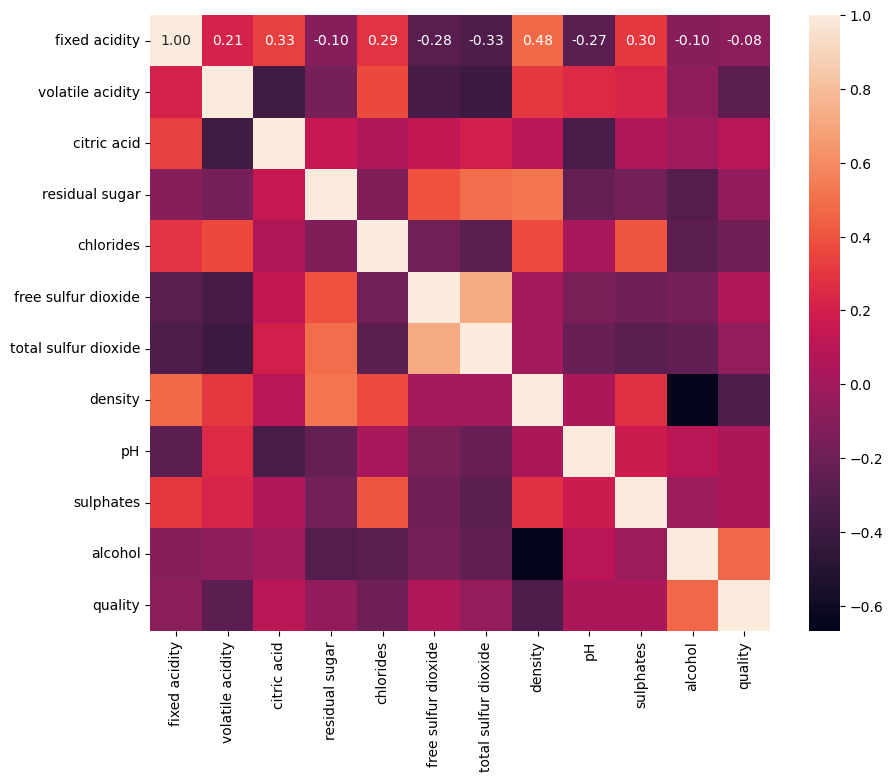

In [171]:
plt.figure(figsize =(10,8))
plot = sns.heatmap(correlation_matrix, annot = True, fmt=".3f")

### **`Pair Plot`**

Pair plots are used to determine if there is a correlation between variables. By that standard, the following **x** values will be tested with respect to **y**

x = Alcohol, Chlorides, Citric Acid, Density, Fixed Acidity, Free Sulfur Dioxide, pH, Residual Sugar, Sulphates, Total Sulfur Dioxide, Volatile Acidity 

Y = Quality of the wine

D:\Anaconda Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

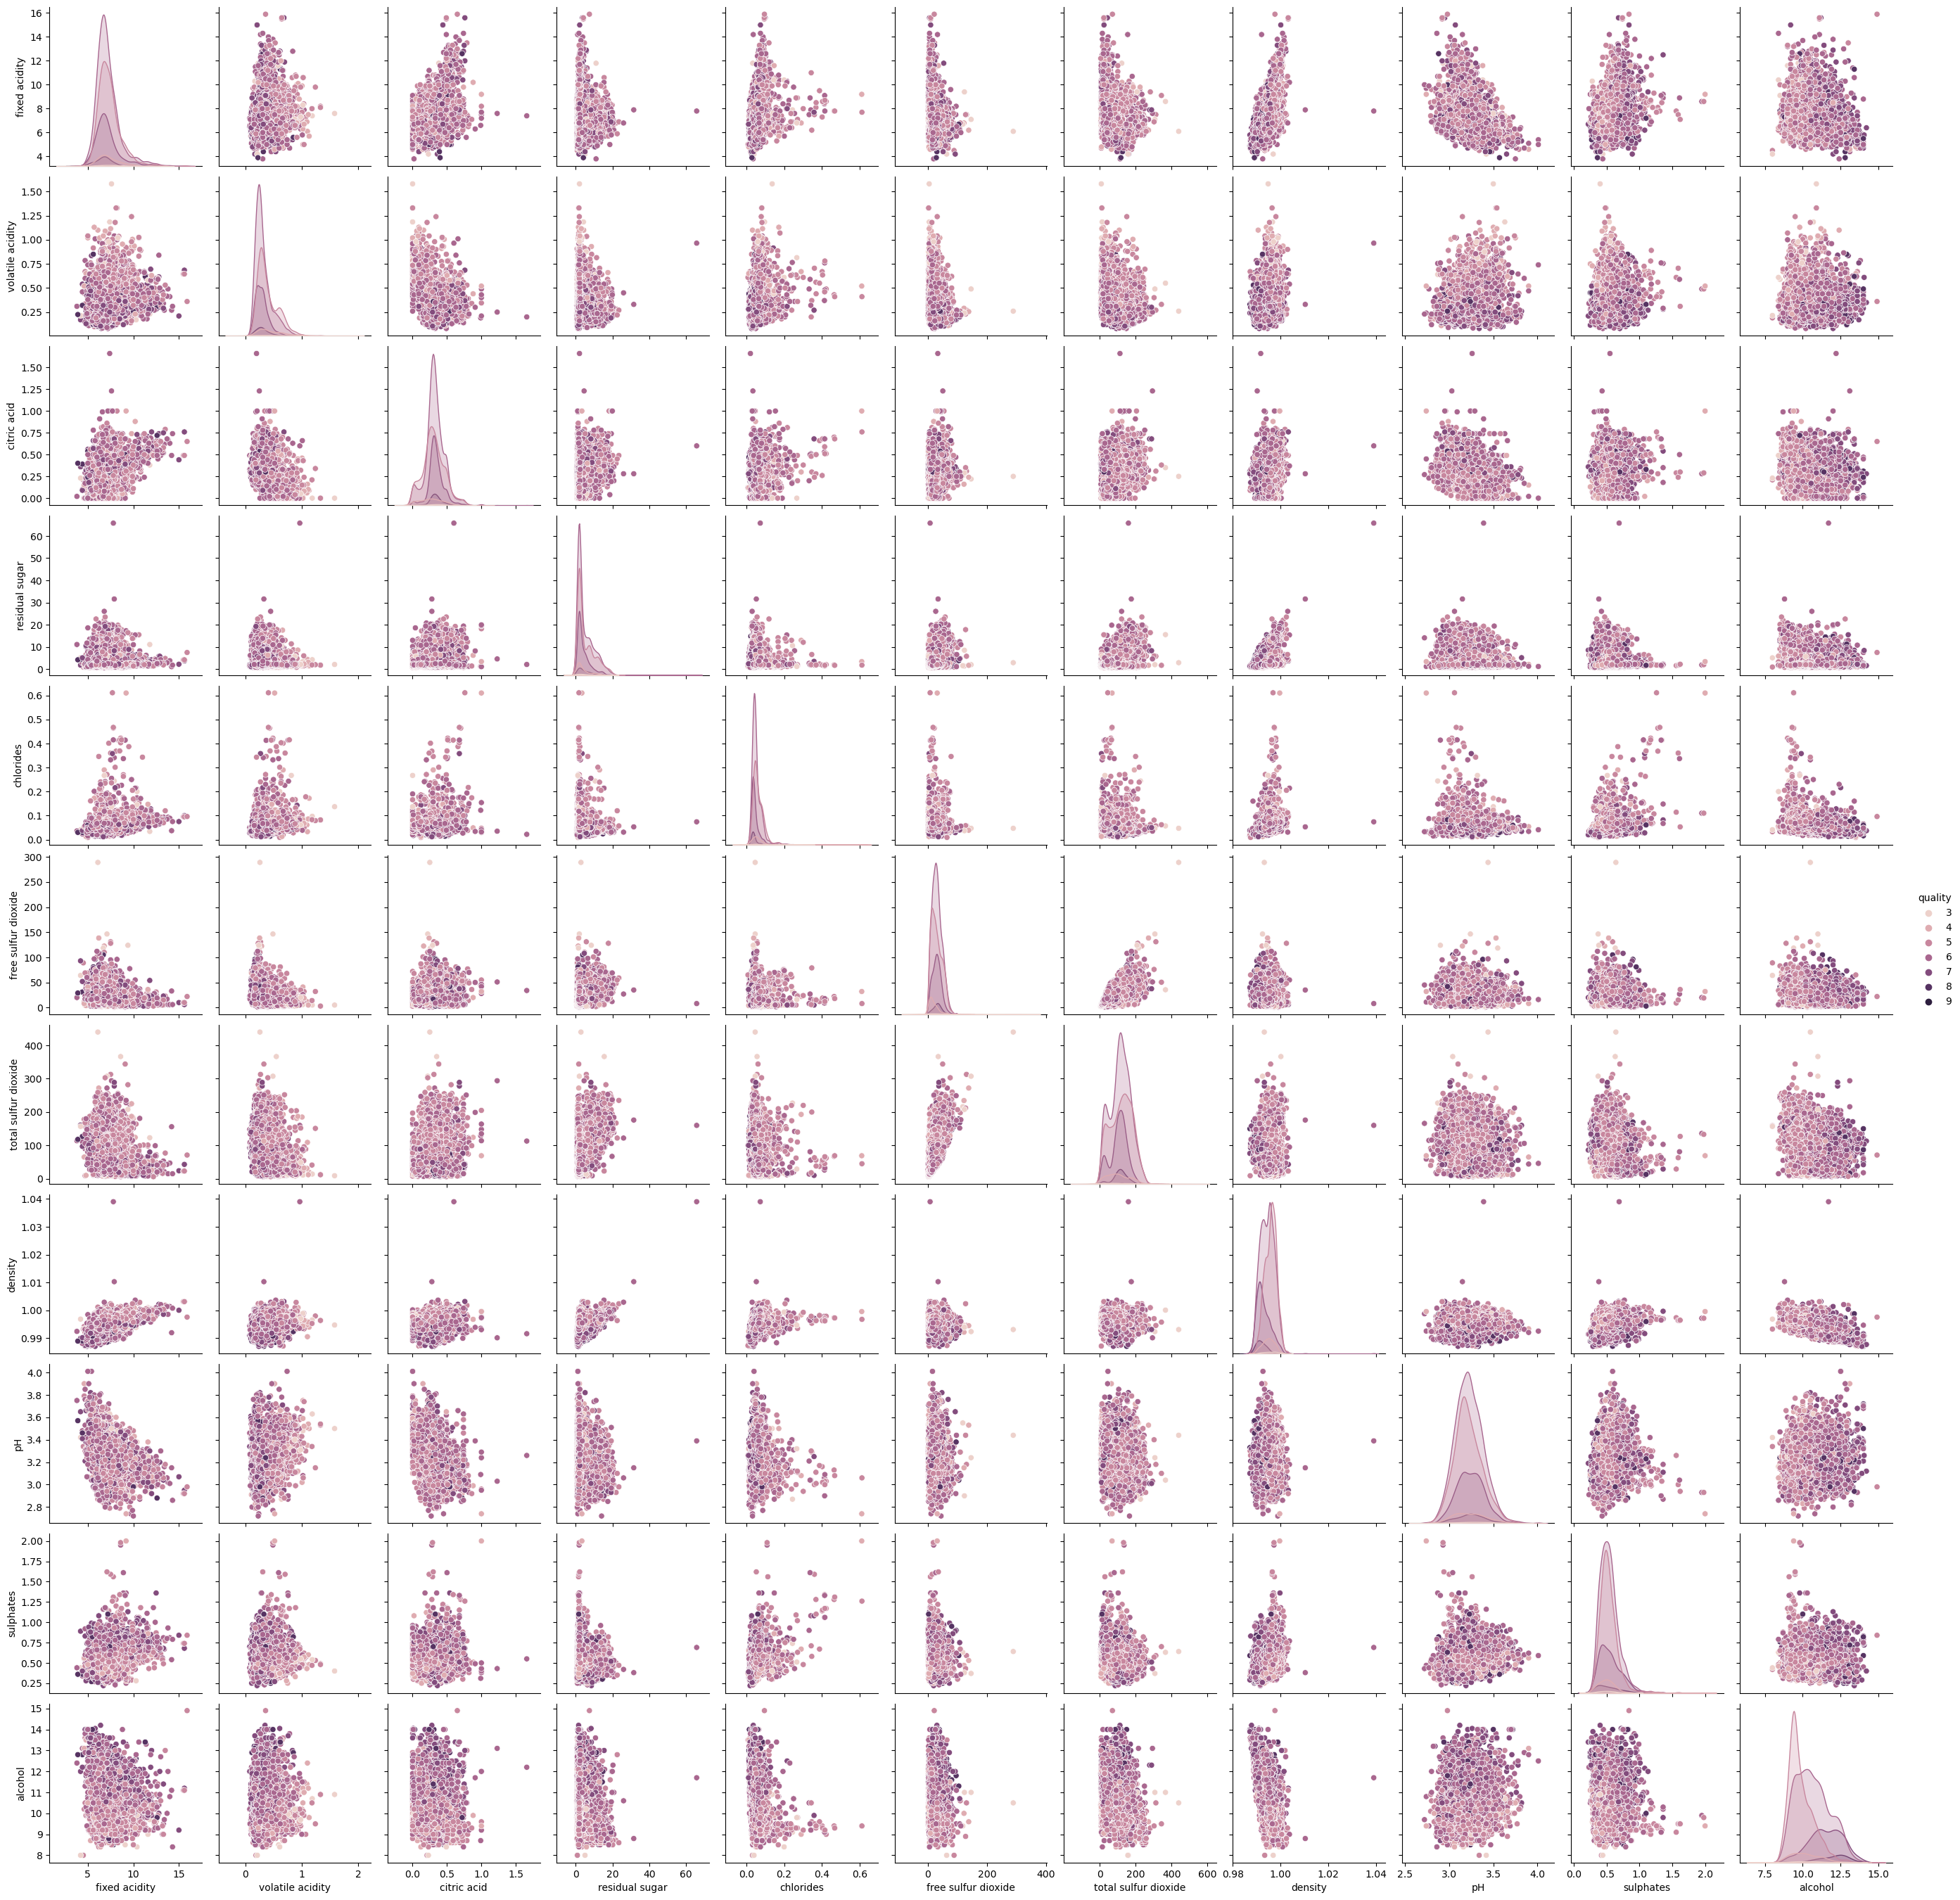

In [172]:
sns.pairplot(df, hue = 'quality')

looking at the scatter plots, it is evident that there is no real correlation between any of the variables with the quality of wine

In [173]:
## 2.) Does there exist any skewnewss among the distribution of each variable except the 'quality'?

### **`Histogram`**

Histograms are used to determine whether or not data is normally distributed, as such the following columns will be tested: 

x = Alcohol, Chlorides, Citric Acid, Density, Fixed Acidity, Free Sulfur Dioxide, pH, Residual Sugar, Sulphates, Total Sulfur Dioxide, Volatile Acidity 

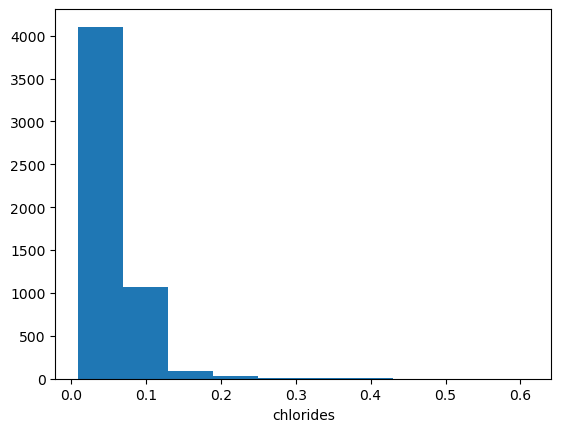

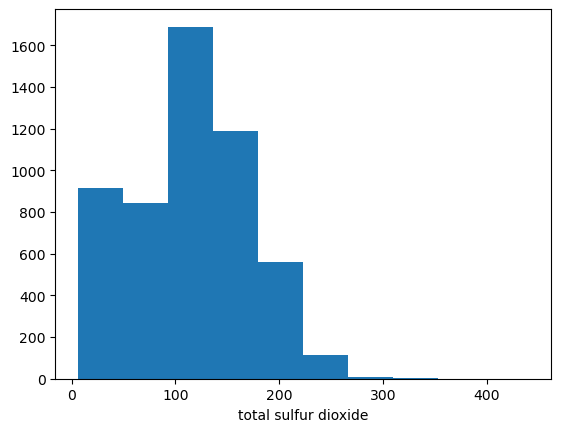

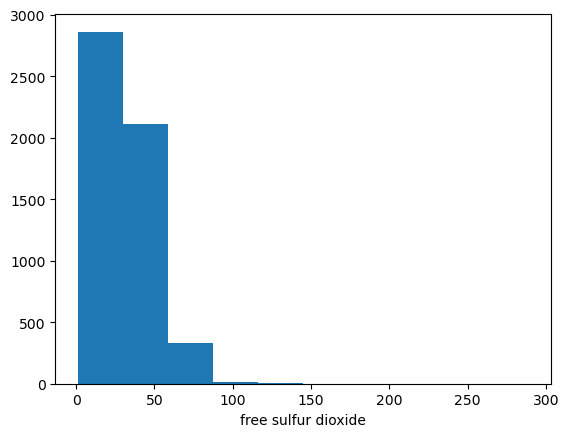

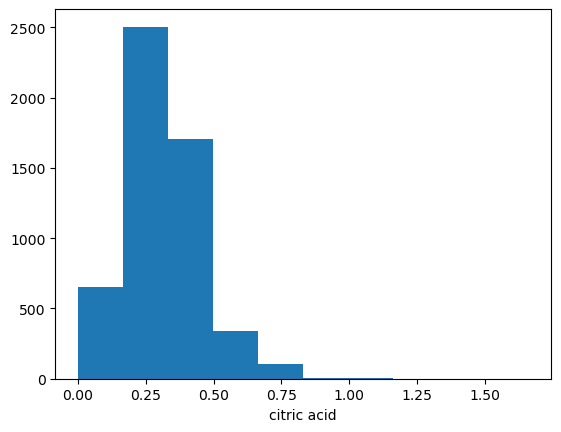

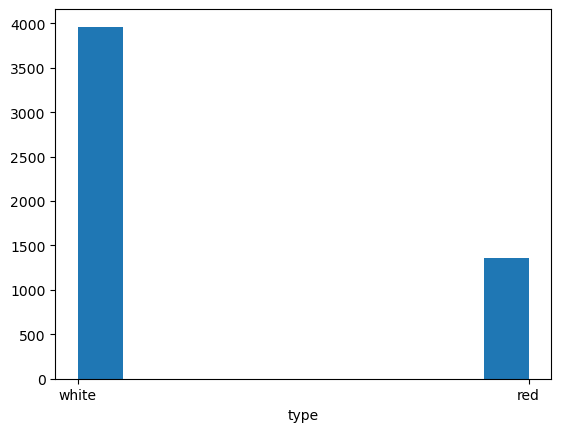

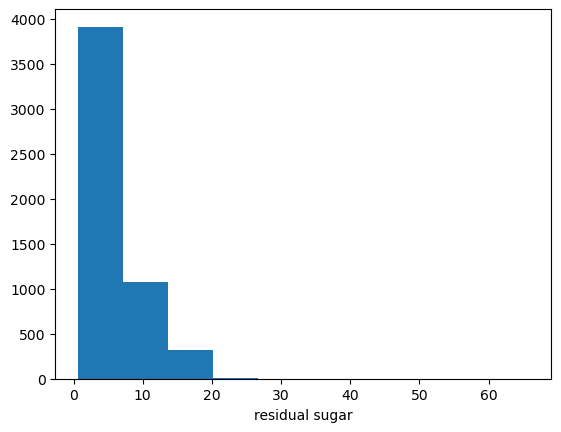

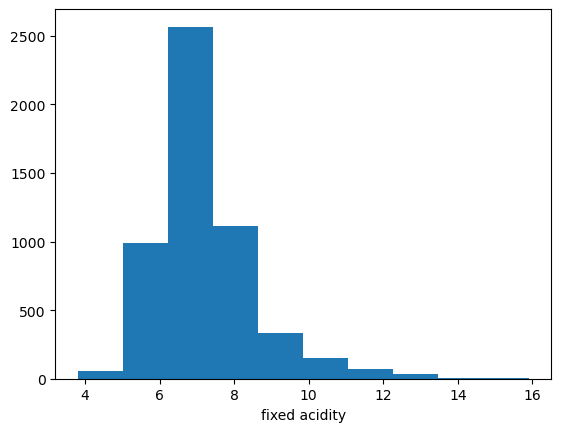

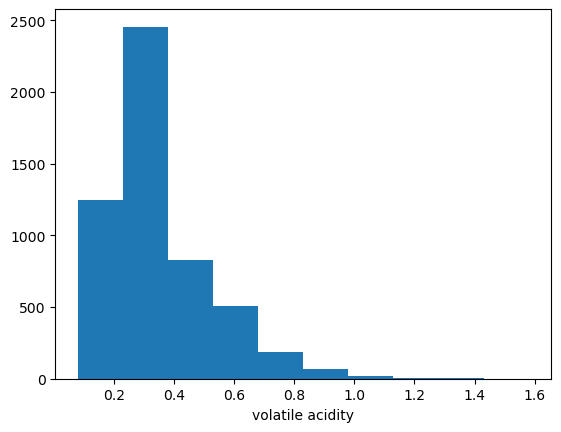

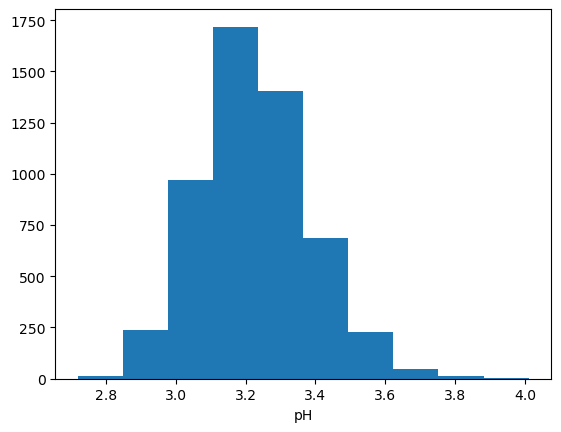

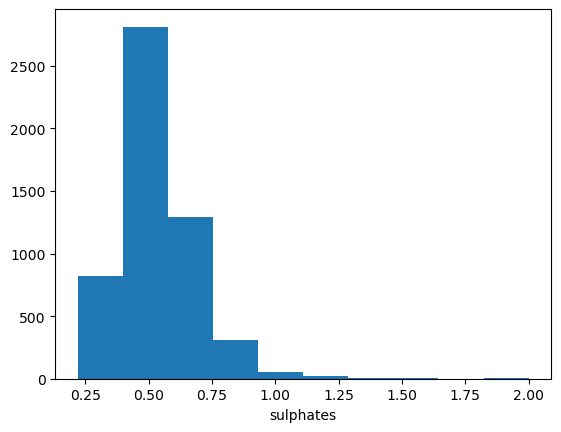

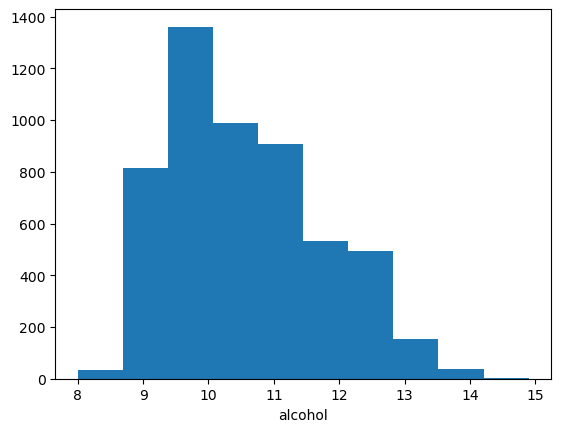

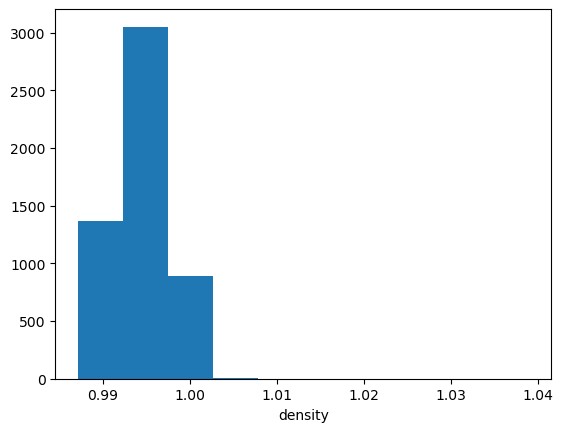

In [174]:
for col in columns: 
    x= df[col]
    plt.hist(x)
    plt.xlabel(col)
    plt.show()

Looking at the histograms the features such as 'pH' and 'density' seem to have positive skewness in their distribution

## 3.) Can the data dispersion be normalized for a better correlation?

<h2>Normalizing Data Distribution</h2>
Via Square root transformation the following Positively Skewed Data
All variables but 'quality', 'density', and 'pH' exhibit positive skewness.


In [191]:
columns_t = df.columns
columns_t = set(columns_t)-set(['pH','type'])
columns_t


{'alcohol',
 'chlorides',
 'citric acid',
 'density',
 'fixed acidity',
 'free sulfur dioxide',
 'quality',
 'residual sugar',
 'sulphates',
 'total sulfur dioxide',
 'volatile acidity'}

The columns selected are presenting only the 9 features of the original data set.

In [176]:
df_copy_transformed = df.copy()
zero_counts = df_copy_transformed.select_dtypes(include=[np.number]).eq(0).sum()
zero_counts

fixed acidity             0
volatile acidity          0
citric acid             136
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

Citric acid has the most counts of zeroes. Racking up 118 of the data points. Dropping these rows will help gauge if normalizing the table would help find correlation better.

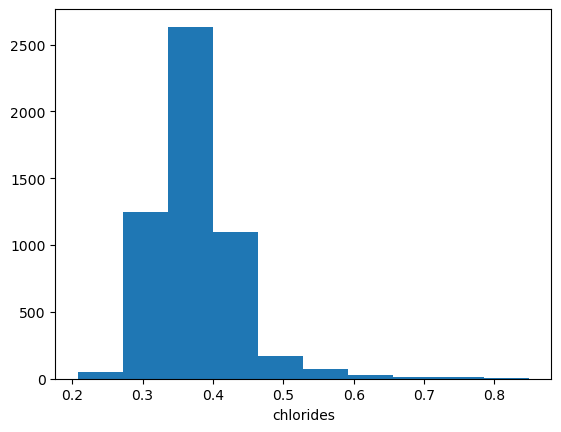

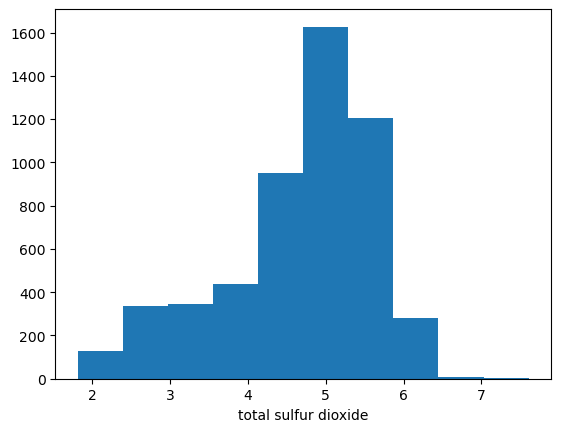

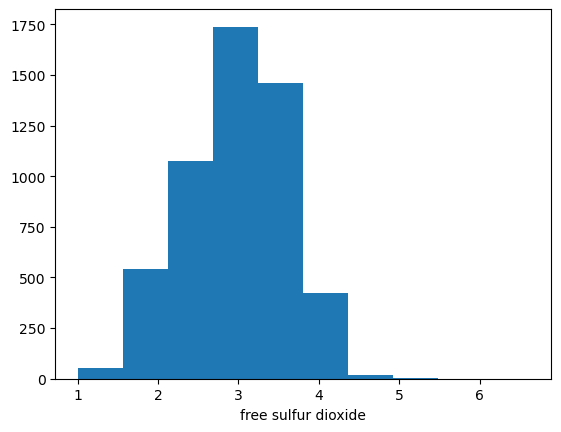

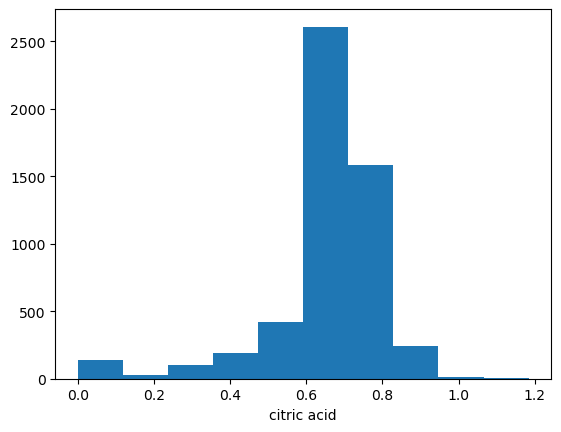

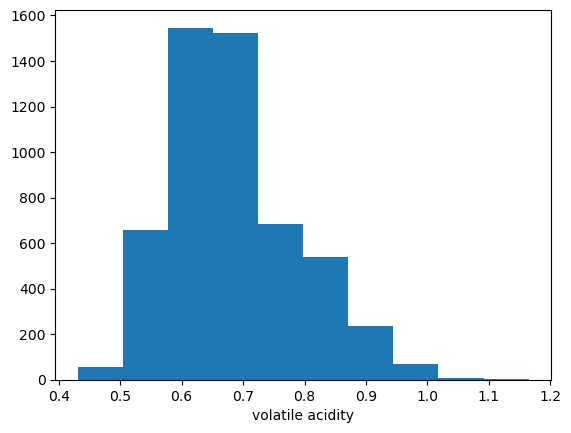

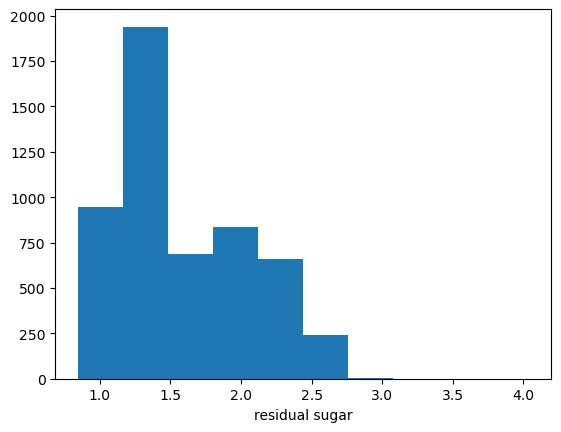

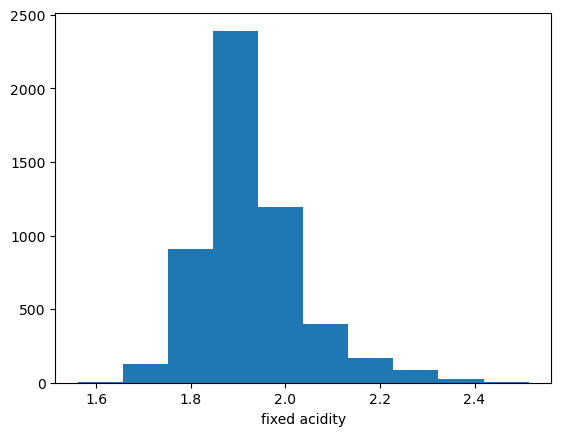

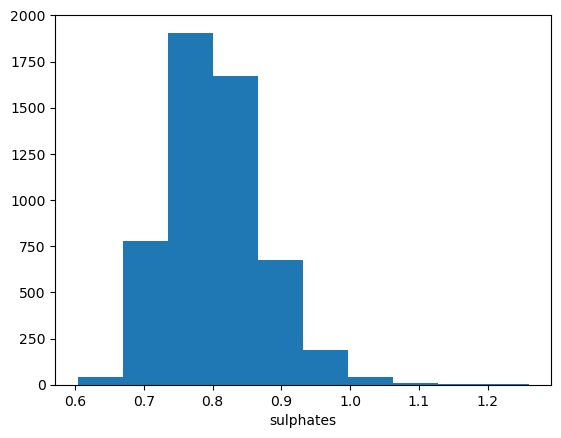

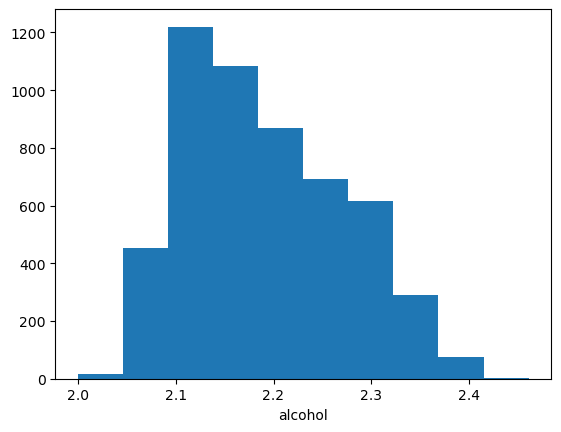

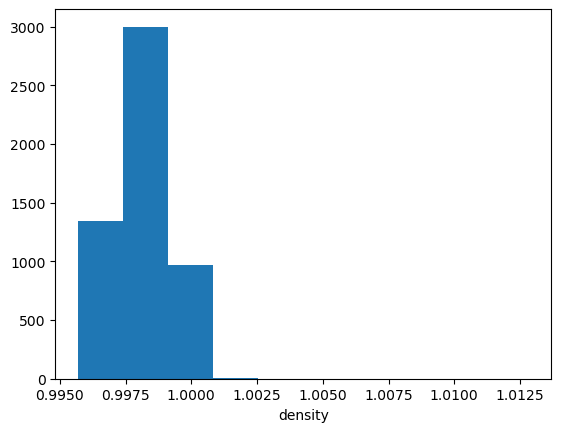

In [136]:
for col in columns_t: 
    x= df_copy_transformed[col].apply(np.cbrt)
    plt.hist(x)
    plt.xlabel(col)
    plt.show()


Citric acid histogram displays apparent negative skewness of distribution. Applying square root normalization instead to the data of citric acid.

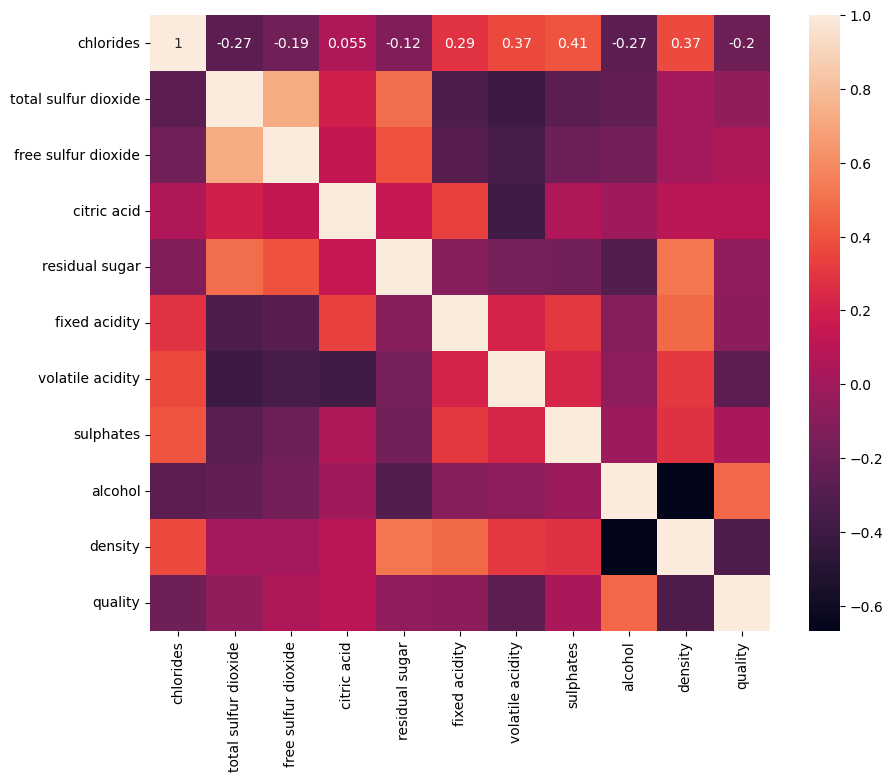

In [194]:
correlation_matrix_2 = df_copy_transformed[list(columns_t)].corr()

plt.figure(figsize =(10,8))
plot = sns.heatmap(df_copy_transformed[list(columns_t)].corr(), annot = True)

In [196]:
formatted_matrix = correlation_matrix_2.map(lambda x: f"{x:.2f}") 
formatted_matrix

chlorides total sulfur dioxide free sulfur dioxide  \
chlorides                 1.00                -0.27               -0.19   
total sulfur dioxide     -0.27                 1.00                0.72   
free sulfur dioxide      -0.19                 0.72                1.00   
citric acid               0.06                 0.19                0.13   
residual sugar           -0.12                 0.49                0.40   
fixed acidity             0.29                -0.33               -0.28   
volatile acidity          0.37                -0.40               -0.35   
sulphates                 0.41                -0.28               -0.20   
alcohol                  -0.27                -0.25               -0.17   
density                   0.37                 0.01                0.01   
quality                  -0.20                -0.05                0.05   

                     citric acid residual sugar fixed acidity  \
chlorides                   0.06          -0.12          0.29   
total sulfur dioxide        0.19           0.49         -0.33   
free sulfur dioxide         0.13           0.40         -0.28   
citric acid                 1.00           0.15          0.33   
residual sugar              0.15           1.00         -0.10   
fixed acidity               0.33          -0.10          1.00   
volatile acidity           -0.38          -0.16          0.21   
sulphates                   0.06          -0.17          0.30   
alcohol                    -0.01          -0.31         -0.10   
density                     0.09           0.52          0.48   
quality                     0.10          -0.06         -0.08   

                     volatile acidity sulphates alcohol density quality  
chlorides                        0.37      0.41   -0.27    0.37   -0.20  
total sulfur dioxide            -0.40     -0.28   -0.25    0.01   -0.05  
free sulfur dioxide             -0.35     -0.20   -0.17    0.01    0.05  
citric acid                     -0.38      0.06   -0.01    0.09    0.10  
residual sugar                  -0.16     -0.17   -0.31    0.52   -0.06  
fixed acidity                    0.21      0.30   -0.10    0.48   -0.08  
volatile acidity                 1.00      0.23   -0.07    0.31   -0.27  
sulphates                        0.23      1.00   -0.02    0.28    0.04  
alcohol                         -0.07     -0.02    1.00   -0.67    0.47  
density                          0.31      0.28   -0.67    1.00   -0.33  
quality                         -0.27      0.04    0.47   -0.33    1.00

Upon inspection of the visualized graph. Only minor changes can be noted in the color changes. The following observations are as follows

- It remains that <b>**`alcohol`**</b> has the most notable stength in correlation to quality.
- <b>**`fixed acidity`**</b> has a moderate positive correlation to <b>**`density`**</b> and <b>**`citric acid`**</b> moderately negative correlation to <b>**`pH`**</b>
- <b>**`volatile acidity`**</b> has low correlatability among other features, including quality, and moderately negative correlation to <b>**`citric acid`**</b>
- 

In [197]:
formatted_matrix = correlation_matrix_2.map(lambda x: f"{x:.3f}") 
formatted_matrix


chlorides total sulfur dioxide free sulfur dioxide  \
chlorides                1.000               -0.270              -0.187   
total sulfur dioxide    -0.270                1.000               0.720   
free sulfur dioxide     -0.187                0.720               1.000   
citric acid              0.055                0.195               0.131   
residual sugar          -0.123                0.488               0.399   
fixed acidity            0.289               -0.327              -0.282   
volatile acidity         0.368               -0.401              -0.349   
sulphates                0.405               -0.276              -0.198   
alcohol                 -0.270               -0.249              -0.170   
density                  0.372                0.007               0.006   
quality                 -0.202               -0.050               0.054   

                     citric acid residual sugar fixed acidity  \
chlorides                  0.055         -0.123         0.289   
total sulfur dioxide       0.195          0.488        -0.327   
free sulfur dioxide        0.131          0.399        -0.282   
citric acid                1.000          0.146         0.330   
residual sugar             0.146          1.000        -0.104   
fixed acidity              0.330         -0.104         1.000   
volatile acidity          -0.384         -0.164         0.215   
sulphates                  0.059         -0.175         0.305   
alcohol                   -0.005         -0.305        -0.103   
density                    0.095          0.521         0.478   
quality                    0.098         -0.057        -0.080   

                     volatile acidity sulphates alcohol density quality  
chlorides                       0.368     0.405  -0.270   0.372  -0.202  
total sulfur dioxide           -0.401    -0.276  -0.249   0.007  -0.050  
free sulfur dioxide            -0.349    -0.198  -0.170   0.006   0.054  
citric acid                    -0.384     0.059  -0.005   0.095   0.098  
residual sugar                 -0.164    -0.175  -0.305   0.521  -0.057  
fixed acidity                   0.215     0.305  -0.103   0.478  -0.080  
volatile acidity                1.000     0.228  -0.065   0.308  -0.265  
sulphates                       0.228     1.000  -0.017   0.283   0.042  
alcohol                        -0.065    -0.017   1.000  -0.668   0.469  
density                         0.308     0.283  -0.668   1.000  -0.326  
quality                        -0.265     0.042   0.469  -0.326   1.000

### **`Box Plot`**

Box plots are used to determine outliers within columns

x = Alcohol, Chlorides, Citric Acid, Density, Fixed Acidity, Free Sulfur Dioxide, pH, Residual Sugar, Sulphates, Total Sulfur Dioxide, Volatile Acidity 

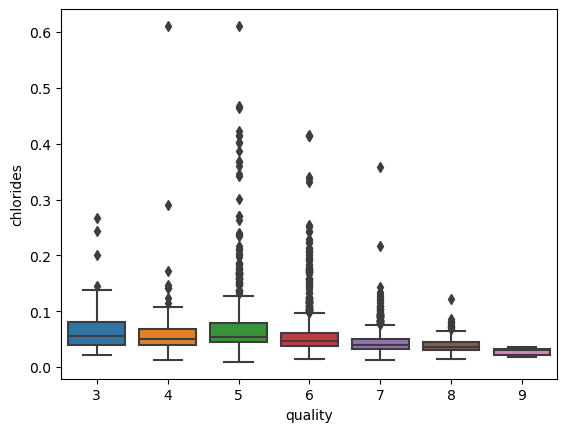

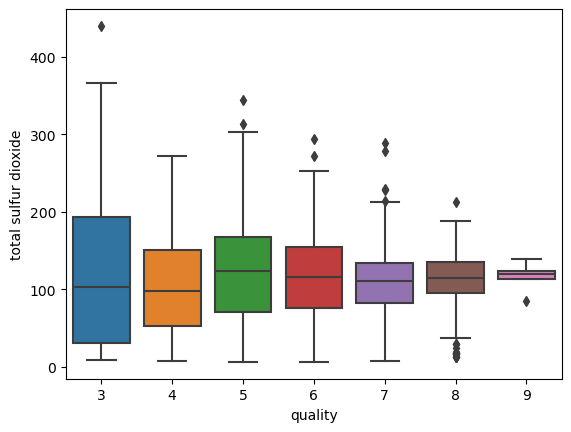

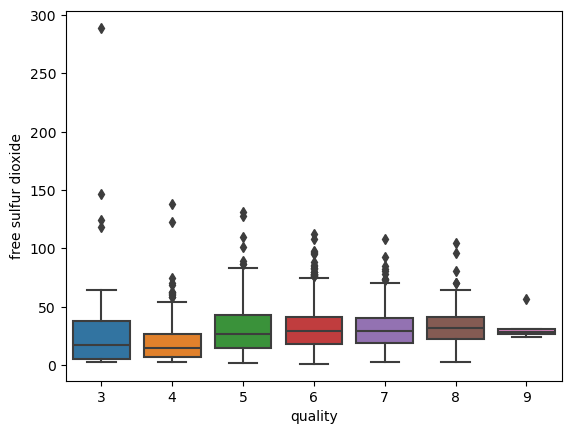

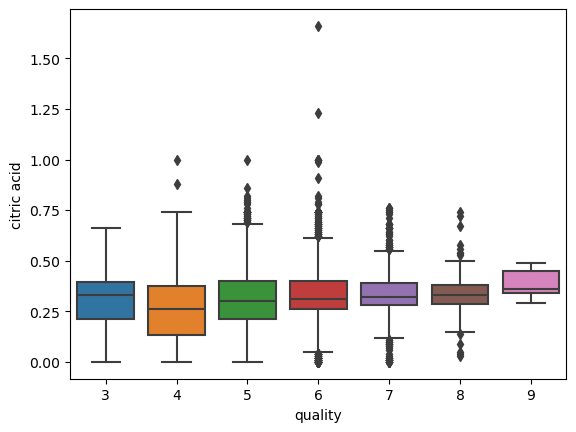

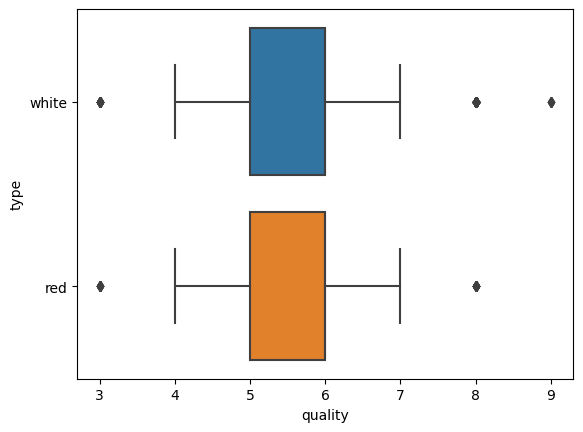

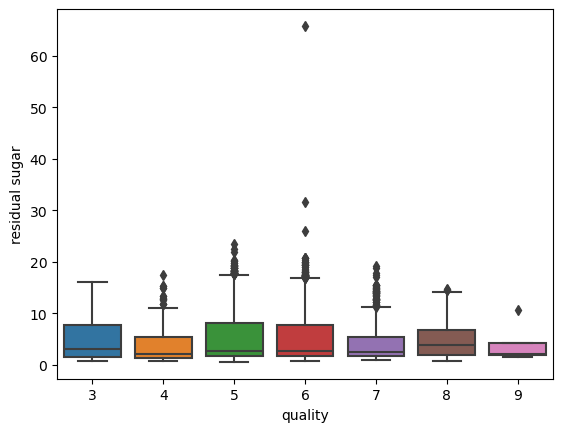

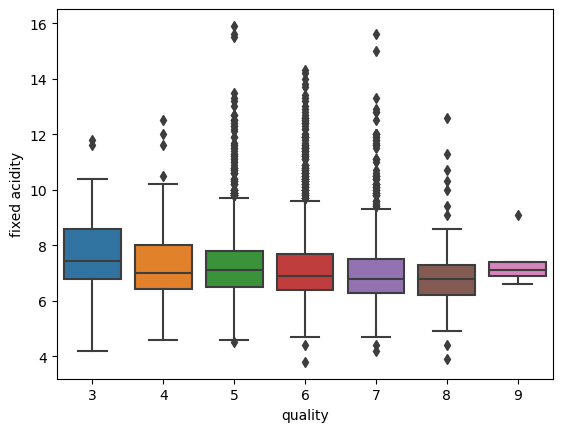

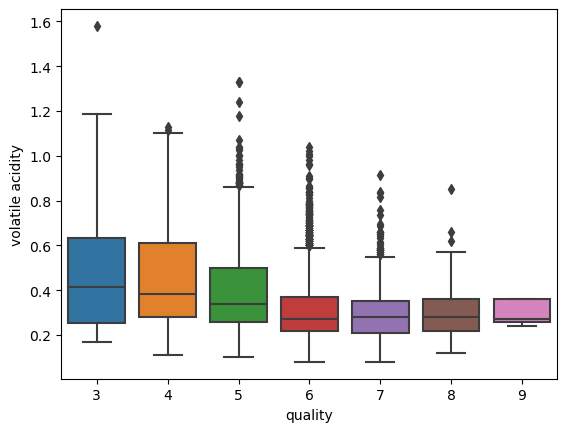

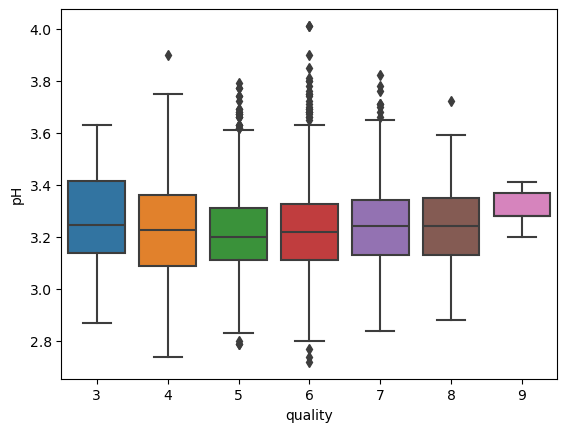

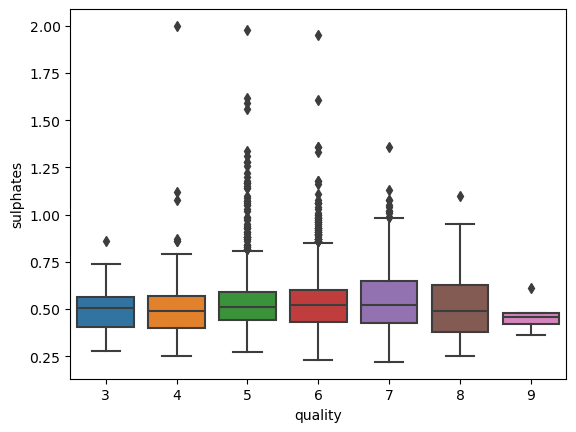

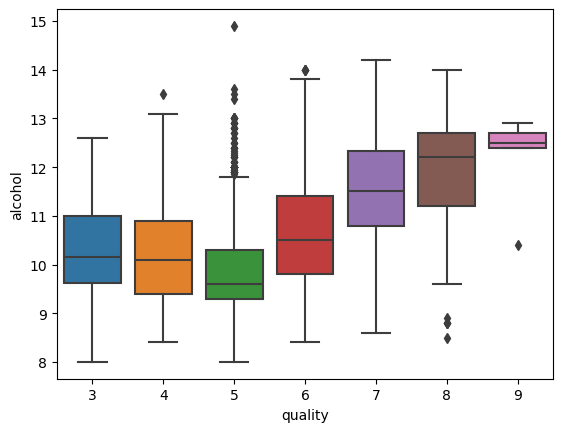

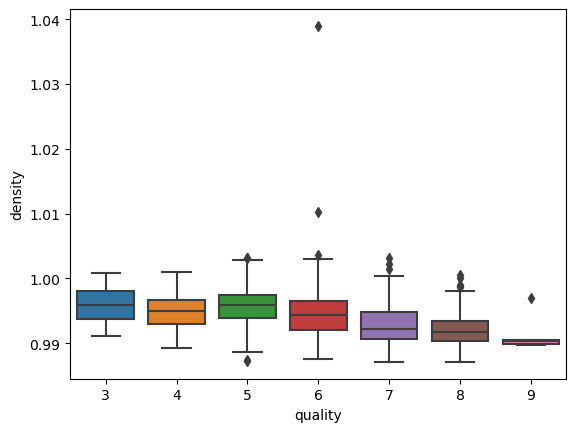

In [199]:
for col in columns:
    sns.boxplot(df, x = 'quality', y = col)
    plt.show()

### **`Removing Outliers`**

In [200]:
def getQuartiles(data):
    upper_quartile = data.quantile(0.75)
    lower_quartile = data.quantile(0)
    return pd.Series([lower_quartile, upper_quartile], index=['Lower Quartile', 'Upper Quartile'])

In [201]:
def remove_outliers(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return group[(group >= lower_bound) & (group <= upper_bound)]

In [234]:
quartiles = []
quartiles_transformed = []
columns_no_type = set(df.columns)-set(['type'])
def remove_outliers_recursive(df, columns):
  """
  This function recursively removes rows with outliers in any column.
  """
  if not columns:
    return df  # Base case: no more columns to assess

  # Get current column name
  current_col = columns[0]

  # Clean the current column by quality group

  cleaned_series = df.groupby('quality')[current_col].apply(remove_outliers)

  # Filter DataFrame to keep rows without outliers in the current column
  df_filtered = df[df[current_col].isin(cleaned_series)]

  # Recursive call with filtered DataFrame and remaining columns
  return remove_outliers_recursive(df_filtered, columns[1:])

for col in columns_no_type:
  
    quartiles.append(df.groupby(['quality'])[col].apply(getQuartiles))
    quartiles_transformed.append(df_copy_transformed.groupby('quality')[col].apply(getQuartiles))


df_final_cleaned = remove_outliers_recursive(df_copy_transformed.copy()[list(columns_no_type)], list(columns_no_type))

df_final_cleaned




chlorides
total sulfur dioxide
free sulfur dioxide
citric acid
residual sugar
fixed acidity
volatile acidity
pH
sulphates
alcohol
density
quality


chlorides  total sulfur dioxide  free sulfur dioxide  citric acid  \
1         0.049                 132.0                 14.0         0.34   
2         0.050                  97.0                 30.0         0.40   
3         0.058                 186.0                 47.0         0.32   
6         0.045                 136.0                 30.0         0.16   
9         0.044                 129.0                 28.0         0.43   
...         ...                   ...                  ...          ...   
6491      0.068                  38.0                 28.0         0.08   
6492      0.090                  44.0                 32.0         0.08   
6493      0.062                  51.0                 39.0         0.10   
6495      0.075                  44.0                 32.0         0.12   
6496      0.067                  42.0                 18.0         0.47   

      residual sugar  fixed acidity  volatile acidity    pH  sulphates  \
1                1.6            6.3             0.300  3.30       0.49   
2                6.9            8.1             0.280  3.26       0.44   
3                8.5            7.2             0.230  3.19       0.40   
6                7.0            6.2             0.320  3.18       0.47   
9                1.5            8.1             0.220  3.22       0.45   
...              ...            ...               ...   ...        ...   
6491             1.9            6.8             0.620  3.42       0.82   
6492             2.0            6.2             0.600  3.45       0.58   
6493             2.2            5.9             0.550  3.52       0.76   
6495             2.0            5.9             0.645  3.57       0.71   
6496             3.6            6.0             0.310  3.39       0.66   

      alcohol  density  quality  
1         9.5  0.99400        6  
2        10.1  0.99510        6  
3         9.9  0.99560        6  
6         9.6  0.99490        6  
9        11.0  0.99380        6  
...       ...      ...      ...  
6491      9.5  0.99651        6  
6492     10.5  0.99490        5  
6493     11.2  0.99512        6  
6495     10.2  0.99547        5  
6496     11.0  0.99549        6  

[4713 rows x 12 columns]

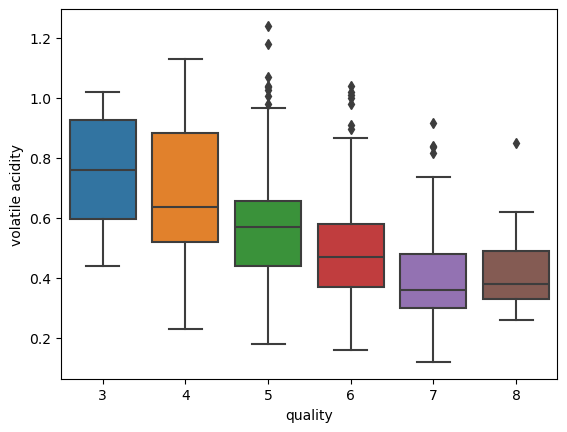

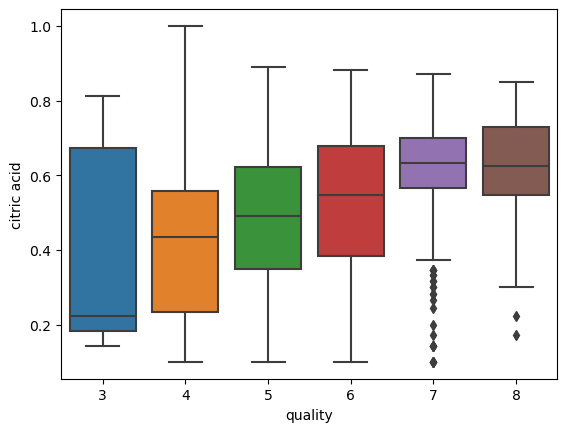

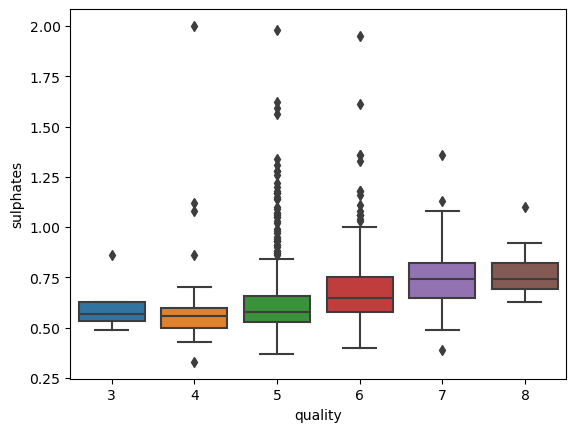

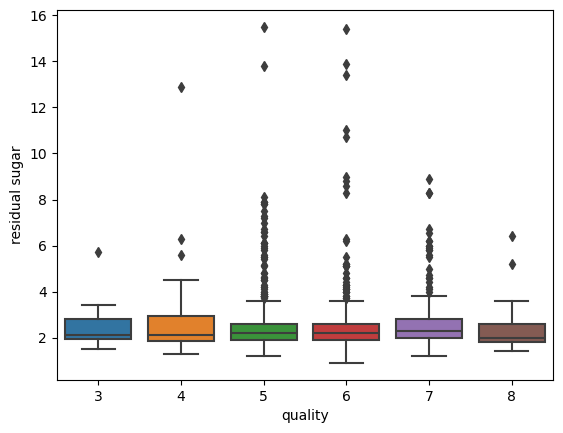

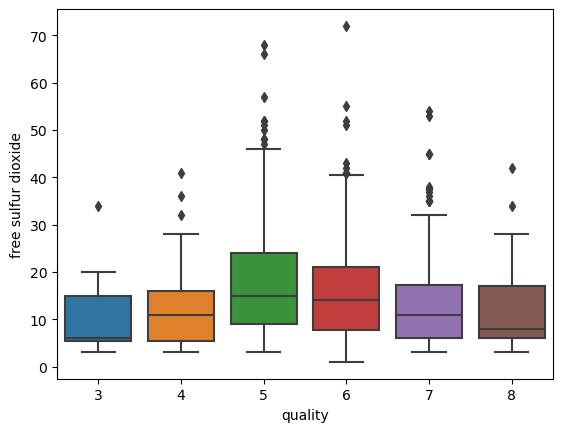

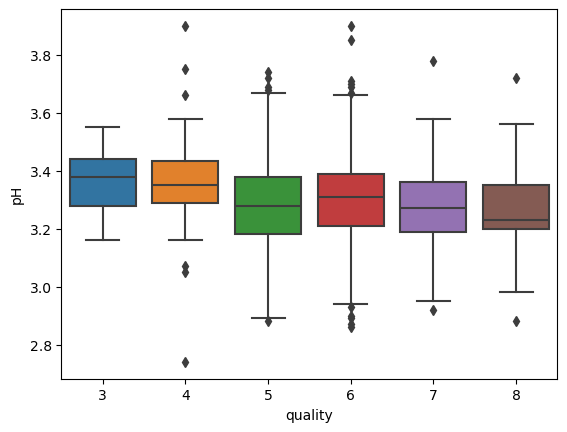

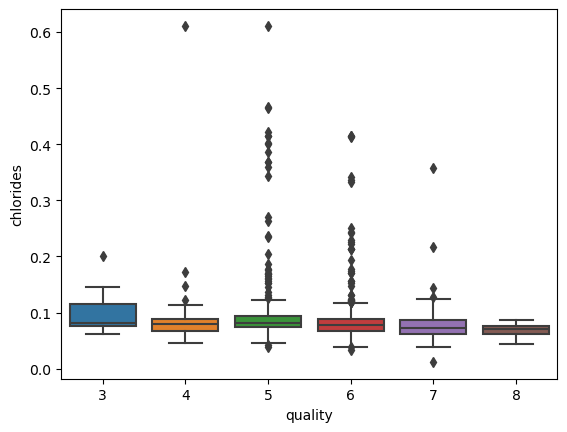

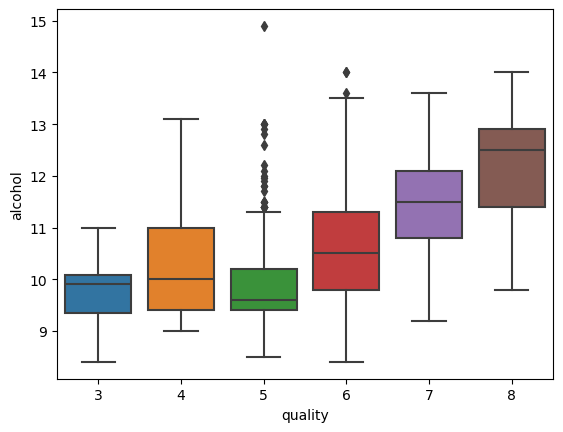

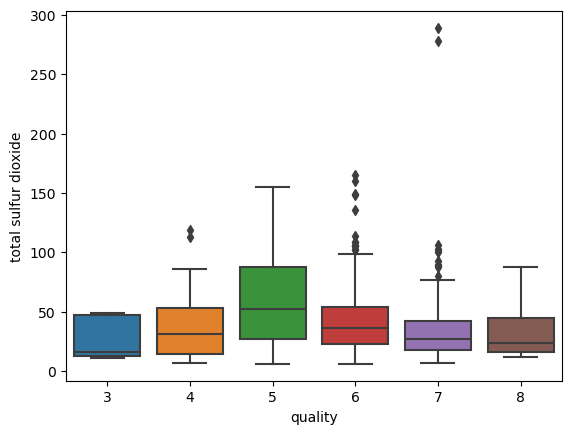

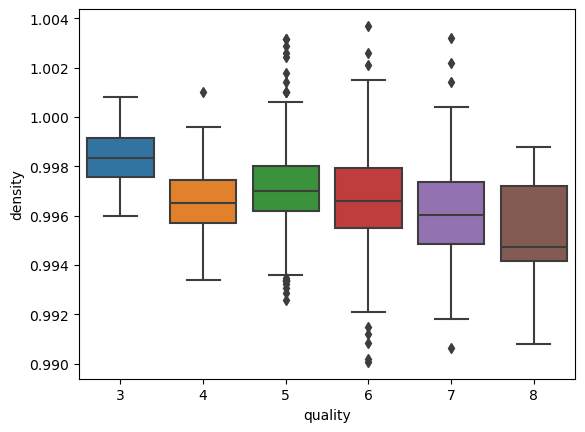

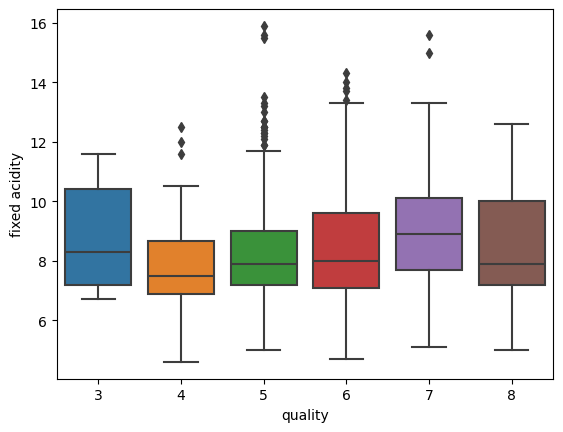

In [49]:
for col in columns:
    sns.boxplot(df_copy_transformed, x = 'quality', y = col)
    plt.show()

In [54]:
df_final_cleaned["free_2_total"] = (df_final_cleaned["free sulfur dioxide"]/df_final_cleaned["total sulfur dioxide"])
df_final_cleaned

corr_new_feature = df_final_cleaned.corr()
corr_new_feature

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.238649     0.639240   
volatile acidity          -0.238649          1.000000    -0.574263   
citric acid                0.639240         -0.574263     1.000000   
residual sugar             0.202500          0.047860     0.128127   
chlorides                  0.182145          0.144462     0.090436   
free sulfur dioxide       -0.146135          0.019032    -0.061259   
total sulfur dioxide      -0.106385          0.179983    -0.008833   
density                    0.641384          0.062311     0.323725   
pH                        -0.689607          0.188584    -0.477331   
sulphates                  0.194689         -0.346972     0.262388   
alcohol                   -0.035180         -0.229818     0.107499   
quality                    0.095211         -0.390714     0.194762   
free_2_total              -0.100981         -0.160076    -0.094292   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.202500   0.182145            -0.146135   
volatile acidity            0.047860   0.144462             0.019032   
citric acid                 0.128127   0.090436            -0.061259   
residual sugar              1.000000   0.239946             0.099030   
chlorides                   0.239946   1.000000             0.034140   
free sulfur dioxide         0.099030   0.034140             1.000000   
total sulfur dioxide        0.183018   0.191874             0.638555   
density                     0.380597   0.421713            -0.020585   
pH                         -0.068101  -0.180359             0.111460   
sulphates                   0.006755  -0.102104             0.032841   
alcohol                     0.072094  -0.328064            -0.065733   
quality                    -0.007986  -0.262517            -0.054227   
free_2_total               -0.145372  -0.210740             0.323877   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.106385  0.641384 -0.689607   0.194689   
volatile acidity                  0.179983  0.062311  0.188584  -0.346972   
citric acid                      -0.008833  0.323725 -0.477331   0.262388   
residual sugar                    0.183018  0.380597 -0.068101   0.006755   
chlorides                         0.191874  0.421713 -0.180359  -0.102104   
free sulfur dioxide               0.638555 -0.020585  0.111460   0.032841   
total sulfur dioxide              1.000000  0.136014 -0.004954  -0.129953   
density                           0.136014  1.000000 -0.284889   0.045406   
pH                               -0.004954 -0.284889  1.000000  -0.010681   
sulphates                        -0.129953  0.045406 -0.010681   1.000000   
alcohol                          -0.280230 -0.523075  0.154416   0.333281   
quality                          -0.245529 -0.261169 -0.042294   0.436850   
free_2_total                     -0.419615 -0.303424  0.155599   0.174765   

                       alcohol   quality  free_2_total  
fixed acidity        -0.035180  0.095211     -0.100981  
volatile acidity     -0.229818 -0.390714     -0.160076  
citric acid           0.107499  0.194762     -0.094292  
residual sugar        0.072094 -0.007986     -0.145372  
chlorides            -0.328064 -0.262517     -0.210740  
free sulfur dioxide  -0.065733 -0.054227      0.323877  
total sulfur dioxide -0.280230 -0.245529     -0.419615  
density              -0.523075 -0.261169     -0.303424  
pH                    0.154416 -0.042294      0.155599  
sulphates             0.333281  0.436850      0.174765  
alcohol               1.000000  0.541967      0.316682  
quality               0.541967  1.000000      0.258581  
free_2_total          0.316682  0.258581      1.000000

### **`Kruskal Wallace Test`**

In [171]:
columns

{'alcohol',
 'chlorides',
 'citric acid',
 'density',
 'fixed acidity',
 'free sulfur dioxide',
 'pH',
 'residual sugar',
 'sulphates',
 'total sulfur dioxide',
 'volatile acidity'}

In [172]:
correlation_matrix_final = df_final_cleaned.corr()
formatted_matrix = correlation_matrix_final.map(lambda x: f"{x:.2f}") 
formatted_matrix

fixed acidity volatile acidity citric acid  \
fixed acidity                 1.00            -0.23        0.64   
volatile acidity             -0.23             1.00       -0.57   
citric acid                   0.64            -0.57        1.00   
residual sugar                0.20             0.06        0.12   
chlorides                     0.18             0.15        0.08   
free sulfur dioxide          -0.14             0.02       -0.06   
total sulfur dioxide         -0.10             0.18       -0.01   
density                       0.64             0.07        0.32   
pH                           -0.69             0.18       -0.47   
sulphates                     0.20            -0.35        0.27   
alcohol                      -0.03            -0.23        0.11   
quality                       0.09            -0.39        0.19   

                     residual sugar chlorides free sulfur dioxide  \
fixed acidity                  0.20      0.18               -0.14   
volatile acidity               0.06      0.15                0.02   
citric acid                    0.12      0.08               -0.06   
residual sugar                 1.00      0.24                0.09   
chlorides                      0.24      1.00                0.04   
free sulfur dioxide            0.09      0.04                1.00   
total sulfur dioxide           0.17      0.20                0.64   
density                        0.37      0.43               -0.02   
pH                            -0.06     -0.17                0.10   
sulphates                      0.00     -0.10                0.03   
alcohol                        0.07     -0.33               -0.07   
quality                       -0.04     -0.27               -0.05   

                     total sulfur dioxide density     pH sulphates alcohol  \
fixed acidity                       -0.10    0.64  -0.69      0.20   -0.03   
volatile acidity                     0.18    0.07   0.18     -0.35   -0.23   
citric acid                         -0.01    0.32  -0.47      0.27    0.11   
residual sugar                       0.17    0.37  -0.06      0.00    0.07   
chlorides                            0.20    0.43  -0.17     -0.10   -0.33   
free sulfur dioxide                  0.64   -0.02   0.10      0.03   -0.07   
total sulfur dioxide                 1.00    0.14  -0.01     -0.13   -0.28   
density                              0.14    1.00  -0.28      0.05   -0.52   
pH                                  -0.01   -0.28   1.00     -0.02    0.15   
sulphates                           -0.13    0.05  -0.02      1.00    0.33   
alcohol                             -0.28   -0.52   0.15      0.33    1.00   
quality                             -0.24   -0.27  -0.04      0.43    0.54   

                     quality  
fixed acidity           0.09  
volatile acidity       -0.39  
citric acid             0.19  
residual sugar         -0.04  
chlorides              -0.27  
free sulfur dioxide    -0.05  
total sulfur dioxide   -0.24  
density                -0.27  
pH                     -0.04  
sulphates               0.43  
alcohol                 0.54  
quality                 1.00

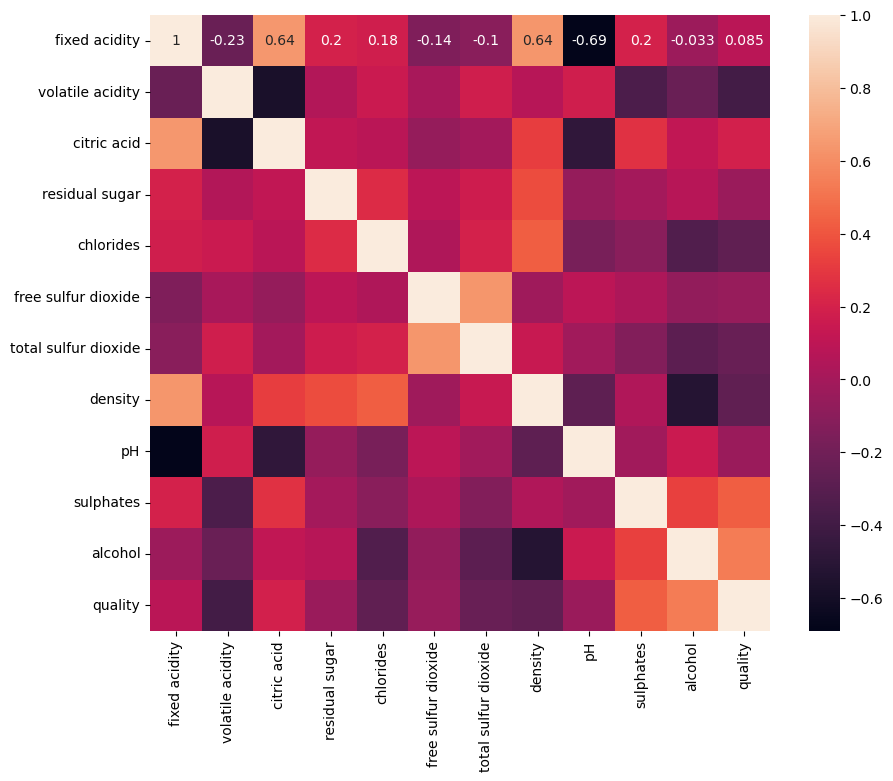

In [173]:


plt.figure(figsize =(10,8))
plot = sns.heatmap(correlation_matrix_final, annot = True)


In [56]:
df_final_cleaned['quality'].value_counts()
df_final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 2 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         990 non-null    float64
 1   volatile acidity      990 non-null    float64
 2   citric acid           990 non-null    float64
 3   residual sugar        990 non-null    float64
 4   chlorides             990 non-null    float64
 5   free sulfur dioxide   990 non-null    float64
 6   total sulfur dioxide  990 non-null    float64
 7   density               990 non-null    float64
 8   pH                    990 non-null    float64
 9   sulphates             990 non-null    float64
 10  alcohol               990 non-null    float64
 11  quality               990 non-null    int64  
 12  free_2_total          990 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 108.3 KB


## Feature Engineering
The Dataset contains high VIF. Therefore the physiochemical properties of the data set have degree correlatability with one another

In [64]:
def calculate_vif(X):
  """
  This function calculates the VIF for each feature in a pandas DataFrame.

  Args:
      X (pandas.DataFrame): The DataFrame containing the independent variables.

  Returns:|
      pandas.Series: A Series containing the VIF value for each feature.
  """
  vif = []
  X_matrix = X.values  # Convert DataFrame to NumPy array
  for i in range(0, X_matrix.shape[1]):
    vif.append(variance_inflation_factor(X_matrix, i))
  return pd.Series(vif, index=X.columns)

In [67]:
selected = df_final_cleaned[list(df_final_cleaned.columns)]
vif_series = calculate_vif(selected)


vif_series

fixed acidity             88.686908
volatile acidity          19.807788
citric acid               22.190600
residual sugar            27.667517
chlorides                 36.288619
free sulfur dioxide       23.876634
total sulfur dioxide      22.660878
density                 1892.678584
pH                      1335.517592
sulphates                 40.775177
alcohol                  185.532137
quality                   86.603369
free_2_total              33.223902
dtype: float64

The features of *density*, *fixed acidity*, *pH*, and *alcohol* have very high collinearity among the other features. We will simply drop them in a new selected dataframe. VIF > 10 cause concern on them being independent variables

In [80]:
all_col = df_final_cleaned.columns
ex_col= ['alcohol', 'pH', 'fixed acidity', 'density', 'quality', "free sulfur dioxide", "total sulfur dioxide", "chlorides", "sulphates"]
spec_col = set(all_col) - set(ex_col)

selected = df_final_cleaned[list(spec_col)]
vif_series = calculate_vif(selected)


vif_series


free_2_total         5.490984
volatile acidity     8.546261
citric acid          7.874869
residual sugar      18.766518
dtype: float64

## Performing PCA
Performing Principal Component Analysis only PCA 1 and PCA 4 shows that there are little-mildly moderate impact from particular mixtures of the features specified above.

In [180]:
selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 2 to 1598
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   residual sugar        983 non-null    float64
 1   free sulfur dioxide   983 non-null    float64
 2   sulphates             983 non-null    float64
 3   total sulfur dioxide  983 non-null    float64
 4   chlorides             983 non-null    float64
 5   citric acid           983 non-null    float64
 6   volatile acidity      983 non-null    float64
dtypes: float64(7)
memory usage: 61.4 KB


In [83]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(selected)

# Define the number of principal components (adjust as needed)
n_components = 3  # You can experiment with different values

# Perform PCA
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

# Transform data
X_pca = pca.transform(X_scaled)
loadings = pca.components_
# Fit a linear regression model
model = LinearRegression()
model.fit(X_pca, df_final_cleaned['quality'])
coefficients = model.coef_


loadings = pca.components_

loadings_df = pd.DataFrame(loadings, columns=list(selected.columns))
loadings_df.index = range(1, 4)
loadings_df

free_2_total  volatile acidity  citric acid  residual sugar
1     -0.059113          0.703717    -0.703227       -0.082221
2     -0.703882          0.197965     0.180349        0.657902
3      0.665356          0.024365    -0.117692        0.736788

In [192]:
# Implementing principal component to the rest of the data set
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df['PredictedQuality'] = model.predict(X_pca)
# pca_df['quality'] = df_final_cleaned['quality']
pca_df


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    1.723941 -0.919882  0.406308  0.736098  1.081232 -0.052817 -0.221539   
1   -0.977281  1.008043 -0.476779 -1.475923 -0.586999  0.085251 -0.142028   
2    1.217853 -1.629984 -1.109263 -0.917726 -0.333226 -0.149736 -0.445091   
3    0.362799 -2.193605 -0.191146  0.367704  0.084037 -0.790810 -0.389916   
4    1.421964 -0.669042  0.134461 -0.966732  0.936903 -0.436967 -0.609918   
..        ...       ...       ...       ...       ...       ...       ...   
978  0.321876 -0.197550 -1.777533  1.374757  1.149840 -0.316406  0.627077   
979  1.650053 -0.032450 -0.679062 -0.193255  0.742586 -1.213647  0.838416   
980  0.845806  0.756156 -2.278701  1.367760  0.233196 -0.796114  0.960279   
981  0.999565  0.115537 -1.387877  0.701929  0.769199 -0.439213  1.017479   
982 -0.832549  1.728417  0.913660  1.341679 -2.029695 -0.368120  0.058504   

     PredictedQuality  
0            5.226606  
1            5.728405  
2            5.175694  
3            5.565973  
4            5.068762  
..                ...  
978          6.070754  
979          5.366009  
980          6.091683  
981          5.735327  
982          6.133782  

[983 rows x 8 columns]

In [89]:
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='quality')
plt.title('Scatter Plot of PC1 vs. PC2')
plt.show()

ValueError: Could not interpret value `PC1` for parameter `x`

## Standardizing values of all features selected

We will be multiplying all the values of each feature seen above and see more properly the effect of such new feature (called "Primary Component"). We will be standardizing the values to be 

In [85]:
standardized_df = pd.DataFrame(X_scaled, columns = list(spec_col))
standardized_df

free_2_total  volatile acidity  citric acid  residual sugar
0       -0.672698          1.492723    -1.603294        0.153154
1       -0.636379         -1.362749     1.365349       -0.685698
2       -0.826591          0.540899    -1.359942       -1.314836
3        0.780051          0.421921    -1.920436       -0.475985
4       -0.980011          0.421921    -1.154787       -0.895410
..            ...               ...          ...             ...
985      2.328376          0.659877    -1.154787       -0.685698
986      2.265817          0.540899    -1.154787       -0.475985
987      2.510531          0.243454    -0.974042       -0.056559
988      2.265817          0.808600    -0.810636       -0.475985
989      0.313096         -1.184282     1.025537        2.879421

[990 rows x 4 columns]

In [86]:
standardized_df['Primary Component'] = standardized_df[list(spec_col-set(['quality']))].prod(axis=1)
standardized_df

free_2_total  volatile acidity  citric acid  residual sugar  \
0       -0.672698          1.492723    -1.603294        0.153154   
1       -0.636379         -1.362749     1.365349       -0.685698   
2       -0.826591          0.540899    -1.359942       -1.314836   
3        0.780051          0.421921    -1.920436       -0.475985   
4       -0.980011          0.421921    -1.154787       -0.895410   
..            ...               ...          ...             ...   
985      2.328376          0.659877    -1.154787       -0.685698   
986      2.265817          0.540899    -1.154787       -0.475985   
987      2.510531          0.243454    -0.974042       -0.056559   
988      2.265817          0.808600    -0.810636       -0.475985   
989      0.313096         -1.184282     1.025537        2.879421   

     Primary Component  
0             0.246570  
1            -0.811911  
2            -0.799464  
3             0.300848  
4            -0.427549  
..                 ...  
985           1.216608  
986           0.673653  
987           0.033671  
988           0.706931  
989          -1.094936  

[990 rows x 5 columns]

free_2_total  volatile acidity  citric acid  \
free_2_total           1.000000         -0.160076    -0.094292   
volatile acidity      -0.160076          1.000000    -0.574263   
citric acid           -0.094292         -0.574263     1.000000   
residual sugar        -0.145372          0.047860     0.128127   
Primary Component      0.107366         -0.091194     0.052737   

                   residual sugar  Primary Component  
free_2_total            -0.145372           0.107366  
volatile acidity         0.047860          -0.091194  
citric acid              0.128127           0.052737  
residual sugar           1.000000          -0.166204  
Primary Component       -0.166204           1.000000

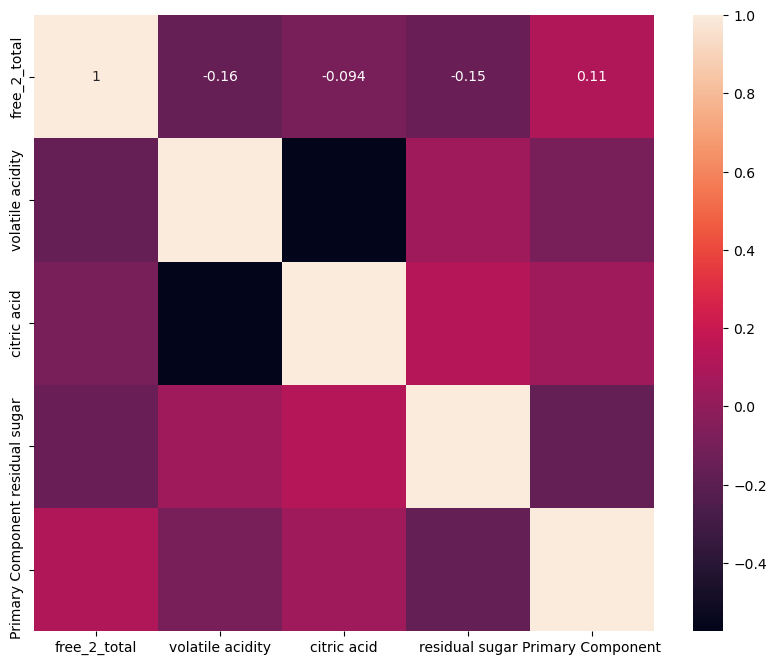

In [87]:

correlation_standardized = standardized_df.corr()

plt.figure(figsize =(10,8))
plot = sns.heatmap(standardized_df.corr(), annot = True)
correlation_standardized

Comment the below section to revert to above values

In [245]:
def update_quality(quality_value):
  """
  This function assigns a new value (0 or 1) to the quality based on conditions.
  """
  if 3 <= quality_value <= 5:
    return 0
  elif 6 <= quality_value <= 8:
    return 1
  else:

    return quality_value
standardized_df_copy = standardized_df.copy()

df_copy_transformed['quality'] = standardized_df_copy['quality'].apply(update_quality)

df_copy_transformed['quality']

2       0
3       1
6       0
8       1
9       0
       ..
1593    1
1594    0
1595    1
1597    0
1598    1
Name: quality, Length: 1241, dtype: int64

Pearson Might not be ideal so we should use point-biserial correlation coefficient

In [246]:
correlation, p_value = pointbiserialr(df_copy_transformed['alcohol'], df_copy_transformed['quality'])
correlation, p_value

(0.4498601296798739, 7.336559381250042e-63)

In [247]:
correlation, p_value = pointbiserialr(df_copy_transformed['volatile acidity'], df_copy_transformed['quality'])
correlation, p_value

(-0.32542462200055455, 5.287978118624087e-32)

In [248]:
correlation, p_value = pointbiserialr(df_copy_transformed['density'], df_copy_transformed['quality'])
correlation, p_value

(-0.16343911418784385, 7.005908130708833e-09)

In [249]:
correlation, p_value = pointbiserialr(df_copy_transformed['citric acid'], df_copy_transformed['quality'])
correlation, p_value

(0.15814525250851125, 2.1338941927377296e-08)

In [250]:
correlation, p_value = pointbiserialr(df_copy_transformed['sulphates'], df_copy_transformed['quality'])
correlation, p_value

(0.20037551217440652, 1.0480083953396337e-12)

# References

- https://sinatech.info/en/acetic-volatile-acidity-in-wine-cider-vinegars-and-juices/#:~:text=Fixed%20acidity%20corresponds%20to%20the,of%20a%20distillation%20process%3A%20formic

- https://www.awri.com.au/industry_support/winemaking_resources/frequently_asked_questions/acidity_and_ph/
- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/point-biserial-correlation/#:~:text=The%20Point%2DBiserial%20Correlation%20Coefficient%20is%20a%20correlation%20measure%20of,scale%20with%20only%20two%20values.
- https://www.ibm.com/topics/ridge-regression#:~:text=Ridge%20regression%20is%20a%20statistical,regularization%20for%20linear%20regression%20models.
- https://www.geeksforgeeks.org/principal-component-regression-pcr/
- https://www.sciencedirect.com/topics/mathematics/variance-inflation-factor#:~:text=remaining%20explanatory%20variables.-,The%20VIF%20of%20an%20explanatory%20variable%20indicates%20the%20strength%20of,give%20some%20cause%20for%20concern.